## HEALTH INSURANCE LEAD PREDICTION

For lead prediction, following steps have been done:

1- Summarising and visualising data

2- Categorising the numeric and categorical variables

3- Imputation of missing values

4- Handling Outliers

5- Creating preprocessing pipelines, train test split for validation purpose

6- Training with Random Forest Classifier and Logistic Regression and evaluating validation scores

7- Prediction on test data

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [2]:
# Reading file
train=pd.read_csv('train_Df64byy.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
# Summary of unique values and nan

d_types = []
n_unique = []
n_nan = []
for col in train.columns:
    d_types.append(train[col].dtypes)
    n_unique.append( train[col].nunique())
    n_nan.append(train[col].isnull().sum())
view = pd.DataFrame({'columns':train.columns , 'd_types':d_types , 'n_unique':n_unique , 'n_nan' : n_nan })
view



,columns,d_types,n_unique,n_nan
0,ID,int64,50882,0
1,City_Code,object,36,0
2,Region_Code,int64,5316,0
3,Accomodation_Type,object,2,0
4,Reco_Insurance_Type,object,2,0
5,Upper_Age,int64,58,0
6,Lower_Age,int64,60,0
7,Is_Spouse,object,2,0
8,Health Indicator,object,9,11691
9,Holding_Policy_Duration,object,15,20251


In [5]:
# The following are categorical variables so the dtype needs to be changed
train['Region_Code']=train['Region_Code'].astype(object)
train['Holding_Policy_Type']=train['Holding_Policy_Type'].astype(object)
train['Reco_Policy_Cat']=train['Reco_Policy_Cat'].astype(object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001671FDECDC0>,
      dtype=object)

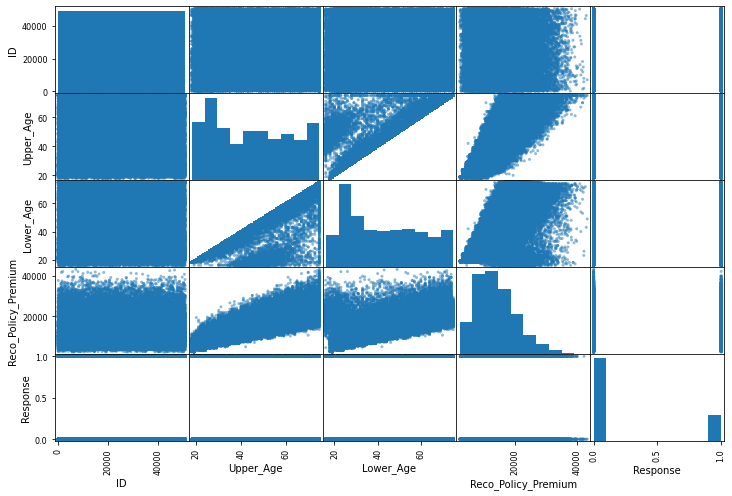

In [6]:
# Visualising numerical variables
from pandas.plotting import scatter_matrix   
scatter_matrix(train , figsize=(12,8))

The numeric variables are not normally distributed

In [7]:
# Summary of numeric columns
train.describe()

,ID,Upper_Age,Lower_Age,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,44.856275,42.738866,14183.950069,0.239947
std,14688.512535,17.310271,17.319375,6590.074873,0.427055
min,1.000000,18.000000,16.000000,2280.000000,0.000000
25%,12721.250000,28.000000,27.000000,9248.000000,0.000000
50%,25441.500000,44.000000,40.000000,13178.000000,0.000000
75%,38161.750000,59.000000,57.000000,18096.000000,0.000000
max,50882.000000,75.000000,75.000000,43350.400000,1.000000


In [8]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [9]:
# Renaming column for uniformity
train=train.rename(columns={'Health Indicator': 'Health_Indicator'})

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  object 
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health_Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  object 
 11  Reco_Policy_Cat          50882 non-null  object 
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(1), int64(4

In [11]:
# Creating seperate list for numerical variables(numlist) and categorical variables(catlist)
# Creating seperate list for numerical variables(numlist) and categorical variables(catlist)
numlist=['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']
catlist=[ 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type',  'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat']

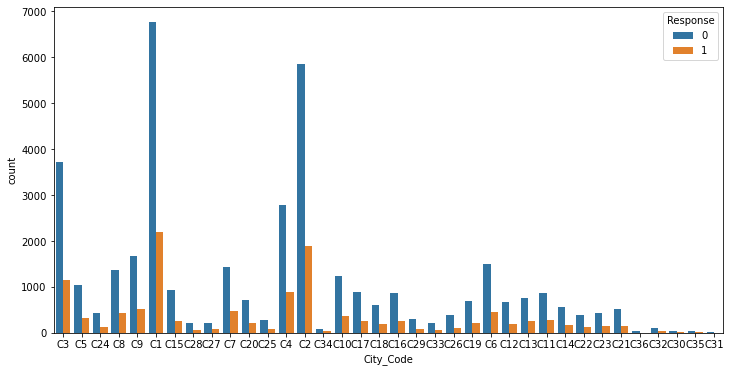

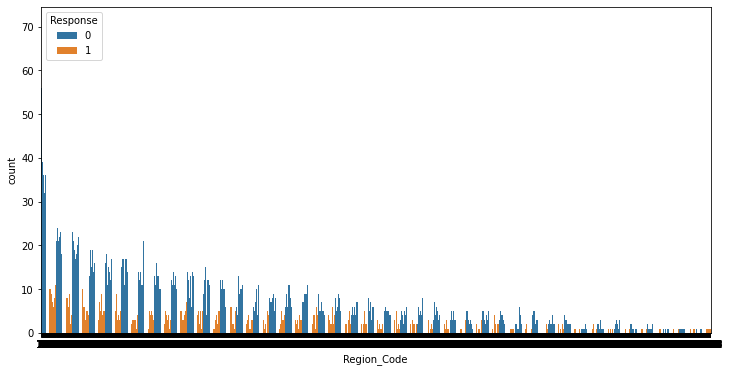

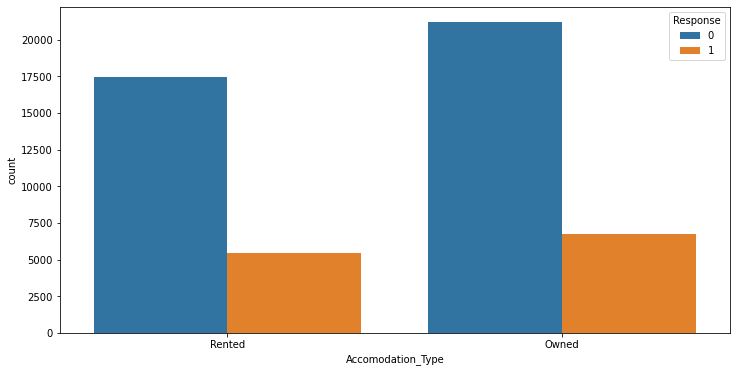

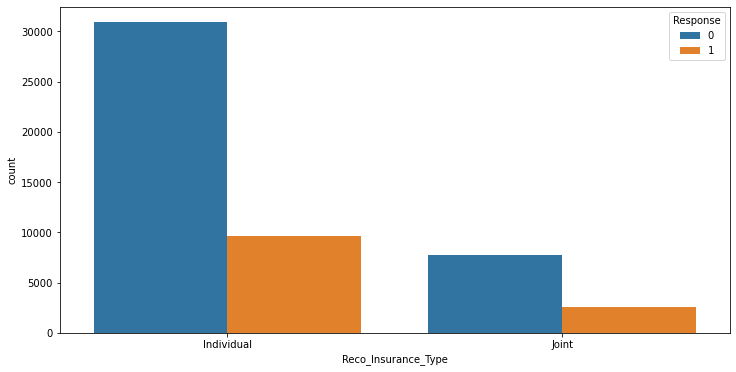

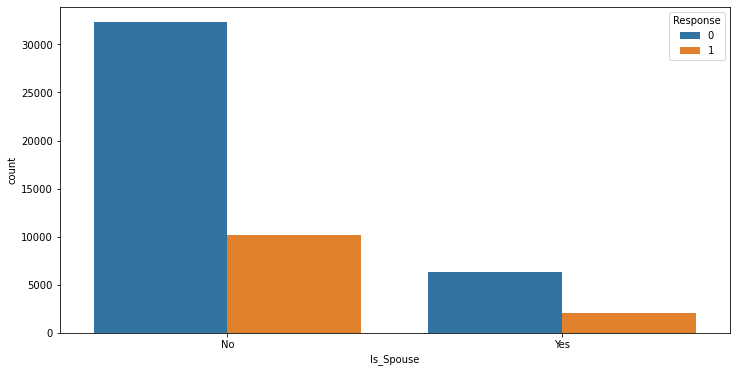

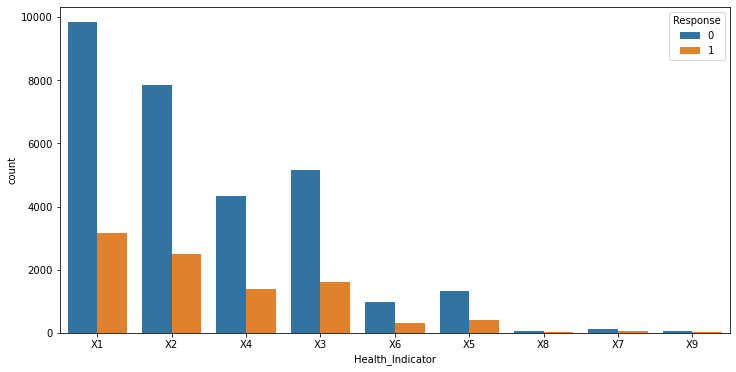

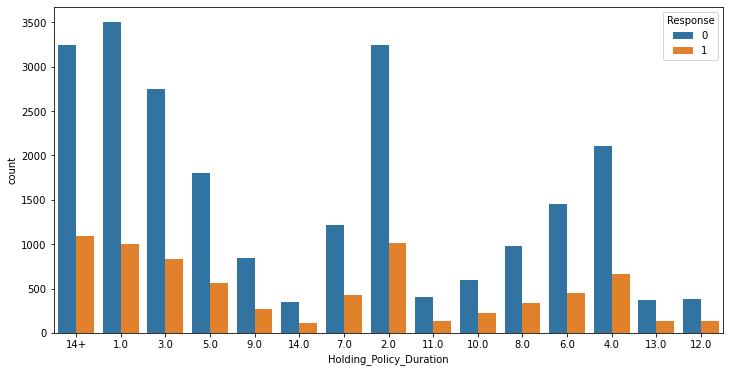

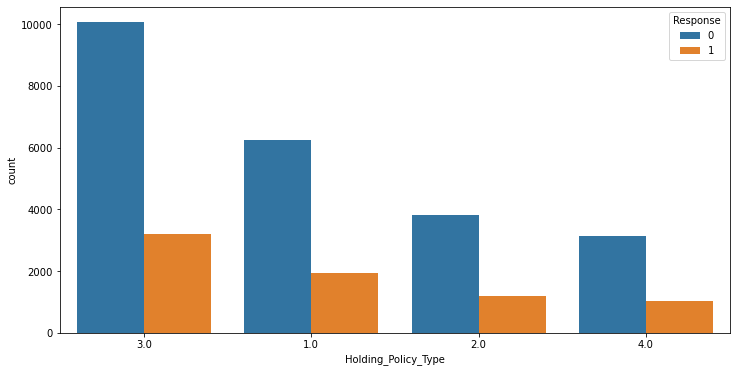

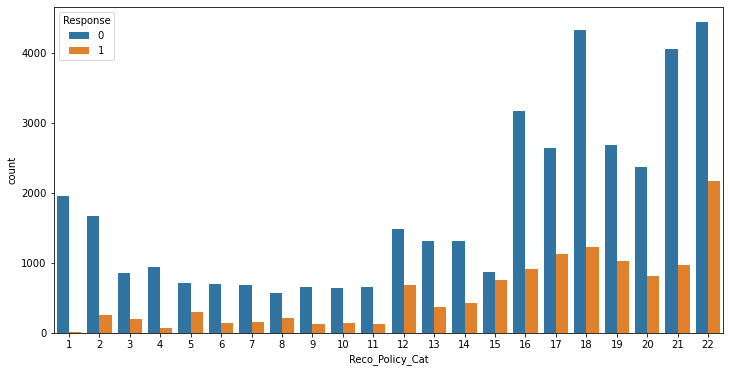

In [12]:
# Visualising categorical variables
for col in train[catlist].columns:
    plt.figure(figsize=(12,6))
    sns.countplot(train[col], hue=train['Response'])

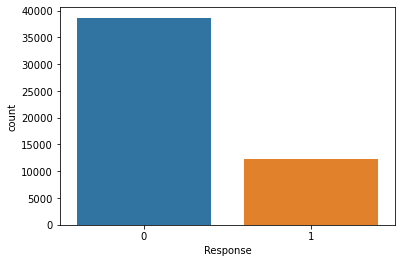

In [13]:
sns.countplot(train['Response'])

CLASS IMBALANCE:
Since there is more representation of 1 class, which is more that the double of 1 class, there is class imbalance. 

#### IMPUTATION OF MISSING VALUES
The missing values are imputed with suitable values that create a seperate category. Category X0 in Health Indicator variable represents 'no information regarding health'. Category 0.0 in Holding policy duration variable represents 'no current policy', similarly category 0 in Holding policy Type represents ' no current policy' 

In [14]:
for col in train[catlist].columns:
    print(col, type(train[col][0]))

City_Code <class 'str'>
Region_Code <class 'int'>
Accomodation_Type <class 'str'>
Reco_Insurance_Type <class 'str'>
Is_Spouse <class 'str'>
Health_Indicator <class 'str'>
Holding_Policy_Duration <class 'str'>
Holding_Policy_Type <class 'float'>
Reco_Policy_Cat <class 'int'>


In [15]:

train['Health_Indicator']=train['Health_Indicator'].fillna('X0')
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].fillna('0')
train['Holding_Policy_Type']=train['Holding_Policy_Type'].fillna(0.0)

#### TREATMENT OF OUTLIERS
There are many columns with very high percentage of outliers in upper range. We can impute these values with 75th quartile value plus 1.5 times inter quartile range. Similarly the lower range outliers can be imputed with 25th quartile value minus 1.5 times interquartile range. For performing this we create the following class

In [16]:
class treat_outliers_by_iqr_range(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        self.stats=X.describe(include=np.number)
        self.iqr_dict={}
        for col in self.stats.columns:
            iqr=self.stats.loc['75%', col]-self.stats.loc['25%', col]
            upper=self.stats.loc['75%', col]+ 1.5*iqr
            lower=self.stats.loc['25%', col]- 1.5*iqr
            self.iqr_dict[col]=(lower,upper)
        return self
    def transform(self, X, y=None):
        # stats includes median data and the columns for which transformations are to be done
        for col in self.stats.columns:
            X[col]=X[col].apply(lambda x : np.where(x>self.iqr_dict[col][1], self.iqr_dict[col][1], x))
            X[col]=X[col].apply(lambda x : np.where(x<self.iqr_dict[col][0], self.iqr_dict[col][0], x))
        return X

#### CREATING PREPROCESSING PIPELINE AND SPLITTING DATA INTO TRAIN AND TEST SET

In [17]:
# PREPROCESSING PIPELINE
num_pipeline=Pipeline([('outliers', treat_outliers_by_iqr_range()),('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler()),])
cat_pipeline=Pipeline([('cat', OneHotEncoder(handle_unknown='ignore')),])
full_pipeline=ColumnTransformer([('num', num_pipeline,numlist), ('cat', cat_pipeline, catlist),])

In [18]:
# Train-test split
X = train.drop(['ID','Response'], axis=1)
y = train['Response'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=3)

In [19]:
for col in X_train.columns:
    print(col, X_train[col].nunique())

City_Code 36
Region_Code 5048
Accomodation_Type 2
Reco_Insurance_Type 2
Upper_Age 58
Lower_Age 60
Is_Spouse 2
Health_Indicator 10
Holding_Policy_Duration 16
Holding_Policy_Type 5
Reco_Policy_Cat 22
Reco_Policy_Premium 6227


In [20]:
X_train=full_pipeline.fit_transform(X_train)
X_test=full_pipeline.transform(X_test)

In [21]:
# Oversampling with SMOTE to take care of imbalanced class
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

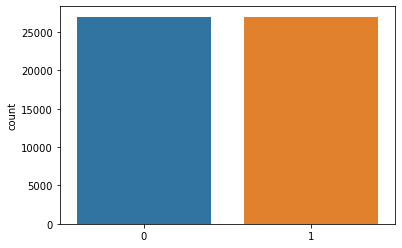

In [22]:
sns.countplot(y_train)

#### TRAINING WITH RANDOM FOREST CLASSIFIER

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
# ROC SCORE ON TRAINSET PREDICTION
train_pred=rf.predict(X_train)
print(roc_auc_score(y_train, train_pred))

1.0


In [25]:
# CLASSIFICATION REPORT OF TRAIN SET PREDICTIONS
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27017
           1       1.00      1.00      1.00     27017

    accuracy                           1.00     54034
   macro avg       1.00      1.00      1.00     54034
weighted avg       1.00      1.00      1.00     54034



In [26]:
# ROC SCORE ON TEST SET PREDICTION
test_pred=rf.predict(X_test)
print(roc_auc_score(y_test, test_pred))

0.5249891338724035


In [27]:
# CLASSIFICATION REPORT OF TEST SET PREDICTIONS
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     11656
           1       0.46      0.08      0.13      3609

    accuracy                           0.76     15265
   macro avg       0.62      0.52      0.50     15265
weighted avg       0.70      0.76      0.69     15265



This model overfits

#### TRAINING WITH LOGISTIC REGRESSION

In [28]:
lr = LogisticRegression(max_iter=500, C=1)
lr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [29]:
# ROC SCORE ON TRAIN SET PREDICTIONS
train_pred=lr.predict(X_train)
print(roc_auc_score(y_train, train_pred))

0.7254691490542992


In [30]:
# CLASSIFICATION REPORT OF TRAIN SET PREDICTIONS
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72     27017
           1       0.71      0.76      0.73     27017

    accuracy                           0.73     54034
   macro avg       0.73      0.73      0.73     54034
weighted avg       0.73      0.73      0.73     54034



In [31]:
# ROC SCORE ON TEST SET PREDICTIONS
test_pred=lr.predict(X_test)
print(roc_auc_score(y_test, test_pred))

0.5707097266746959


In [32]:
# CLASSIFICATION REPORT OF TEST SET PREDICTIONS
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71     11656
           1       0.30      0.50      0.38      3609

    accuracy                           0.61     15265
   macro avg       0.55      0.57      0.55     15265
weighted avg       0.69      0.61      0.63     15265



#### PREDICTIONS OF TEST DATA

In [33]:
submission=pd.read_csv('sample_submission_QrCyCoT.csv')


In [34]:
submission

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [35]:
test = pd.read_csv('test_YCcRUnU.csv')

#### PREPROCESSING TEST DATA

In [36]:
test['Region_Code']=test['Region_Code'].astype(object)
test['Holding_Policy_Type']=test['Holding_Policy_Type'].astype(object)
test['Reco_Policy_Cat']=test['Reco_Policy_Cat'].astype(object)


In [37]:
test=test.rename(columns={'Health Indicator': 'Health_Indicator'})

In [38]:
test['Health_Indicator']=test['Health_Indicator'].fillna('X0')
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].fillna('0.0')
test['Holding_Policy_Type']=test['Holding_Policy_Type'].fillna(0)

In [39]:
test_set=full_pipeline.transform(test.drop(['ID'], axis=1))

In [40]:
# PREDICTIONS WITH LOGISTIC REGRESSION
test_set_pred=lr.predict(test_set)

In [41]:
submission['Response']=test_set_pred
submission.to_csv('my_submission7.csv', index=False)